# Visualising data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from astropy.time import Time, TimeDelta
from datetime import datetime
from sklearn.metrics import accuracy_score

In [3]:
data_file = '../Data/moon_sighting_data.csv'
data = pd.read_csv(data_file)

icouk_data = data[data["Source"]=="ICOUK"]
icop_data = data[data["Source"]=="ICOP"]
icop23_data = data[data["Source"]=="ICOP23"]
alrefay_data = data[data["Source"]=="ALREFAY"]
#allawi_data= data[data["Source"=="SCHAEFER-ODEH"]]
yallop_data = data[data["Source"]=="YALLOP"]

# sources = [icouk_data,icop_data,alrefay_data,allawi_data, yallop_data]
# source_names = ["ICOUK", "ICOP", "Alrefay", "Allawi","Yallop"]

sources = [icouk_data,icop_data,icop23_data,alrefay_data,yallop_data]
source_names = ["ICOUK", "ICOP", "ICOP23","Alrefay", "Yallop"]
colours = ["red", "green", "yellow", "blue"]

print(data.shape[0])
counts = data[['Date', 'Latitude',"Longitude"]].value_counts()
print(f"Unique values: {counts[counts==1].shape[0]}")
#data = data[data["Cloud Level"] == 0]
data.head(5)

print(data[data['Date']>2458484.5].shape[0])

5302
Unique values: 4849
2691


In [4]:
for source, name in zip(sources,source_names):
    min_date = Time(np.min(source["Date"]),format="jd").strftime("%d/%m/%Y")
    max_date = Time(np.max(source["Date"]),format="jd").strftime("%d/%m/%Y")
    print(f"{name}: {source.shape[0]} sightings, {min_date}-{max_date}")

counts = data[['Date', 'Latitude',"Longitude"]].value_counts()
print(f"Unique values: {counts[counts==1].shape[0]} \n")

uniques = 0
for source, name in zip(sources,source_names):
    counts = source[['Date', 'Latitude',"Longitude"]].value_counts()
    unique_values = counts[counts==1].shape[0]
    uniques += unique_values
    print(f"{name} Unique values: {unique_values}")
print(uniques)

ICOUK: 651 sightings, 13/10/2015-16/09/2023
ICOP: 2133 sightings, 16/12/2009-24/05/2020
ICOP23: 1747 sightings, 20/06/2020-14/11/2023
Alrefay: 476 sightings, 18/03/1988-13/11/2015
Yallop: 295 sightings, 01/07/1859-21/01/1996
Unique values: 4849 

ICOUK Unique values: 521
ICOP Unique values: 1989
ICOP23 Unique values: 1617
Alrefay Unique values: 467
Yallop Unique values: 255
4849


c:\ProgramData\miniconda3\envs\mphys-moon\Lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


## Geographic distribution of sightings

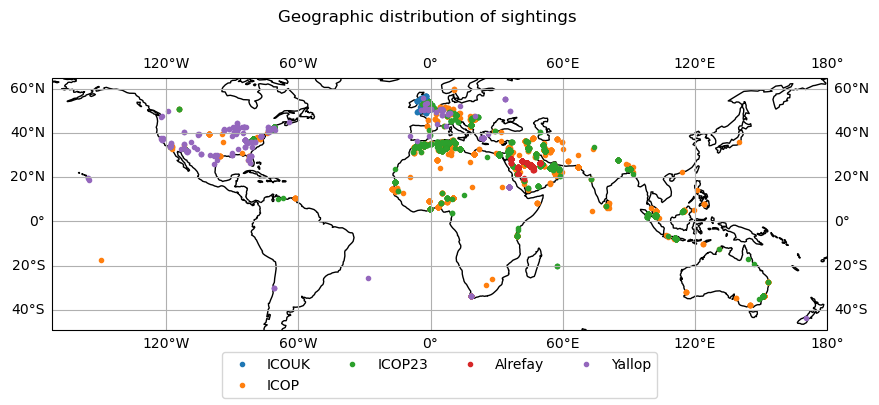

In [5]:
x = data["Longitude"]
y= data["Latitude"]
crs = ccrs.PlateCarree()
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111,projection=crs)
ax.coastlines()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

for source, name in zip(sources,source_names):
    x = source["Longitude"]
    y = source["Latitude"]
    ax.plot(x,y,".",label=name)

fig.suptitle("Geographic distribution of sightings")
fig.legend(loc="lower center",ncol=4)
plt.show()

In [6]:
lissues = data[np.logical_and(data["Longitude"]<-20,data["Longitude"]>-50)]
lissues.head()

#print(data["Method"].str.startswith('NaN').sum())

,Index,Date,Latitude,Longitude,Moon Age,Sunset,Moonset,Lag,Moon Alt,Moon Az,...,Parallax,W,W',q,q',Cloud Level,Seen,Method,Methods,Source
5100,93,2.437760e+06,-25.8,-28.2,1.019,2.437760e+06,2.437760e+06,54.46667,5.97975,281.11399,...,60.22166,0.50305,0.50397,0.33853,0.33905,0.0,Seen,Seen_eye,Seen_eye;Seen_binoculars;Seen_telescope;Seen_ccd,YALLOP


## Visibility

In [7]:
def plot_pie_distribution(column, title,labels=[]):

    fig = plt.figure(figsize=(10,5))

    pies = data[column].value_counts(sort=False)
    if len(labels) == 0:
        labels = data[column].unique()
        labels = np.char.replace(labels.astype(str),"_"," ")
    ax1 = fig.add_subplot(2,3,1)
    ax1.pie(pies, labels=labels, autopct='%1.0f%%')
    ax1.set_title("All sources")
    ax1.set_xlabel(f"N={data.shape[0]}")

    for i, source in enumerate(sources):
        pies = source[column].value_counts(sort=False)
        labels = source[column].unique()
        ax = fig.add_subplot(2,3,i+2)
        labels = np.char.replace(labels.astype(str),"_"," ")
        ax.pie(pies,labels=labels,autopct='%1.0f%%')
        ax.set_title(source_names[i])
        ax.set_xlabel(f"N={source.shape[0]}")

    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

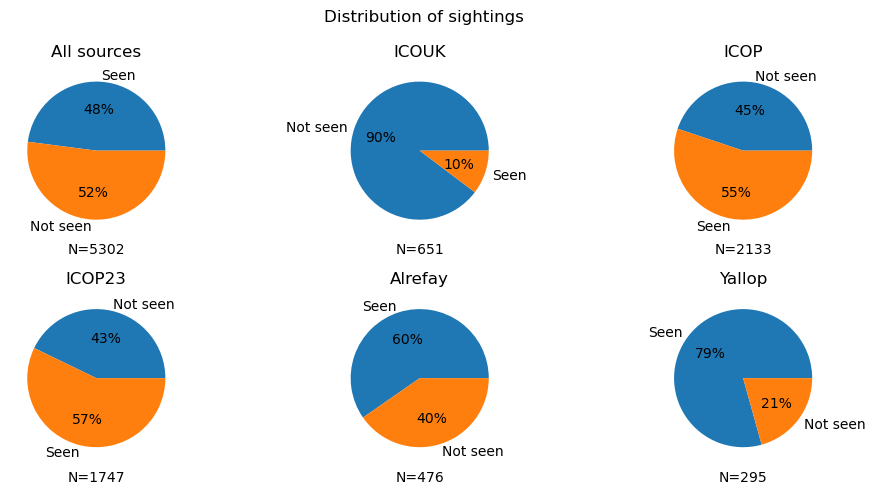

In [8]:
seen_labels=["Seen", "Not seen"]
plot_pie_distribution("Seen", "Distribution of sightings",seen_labels)

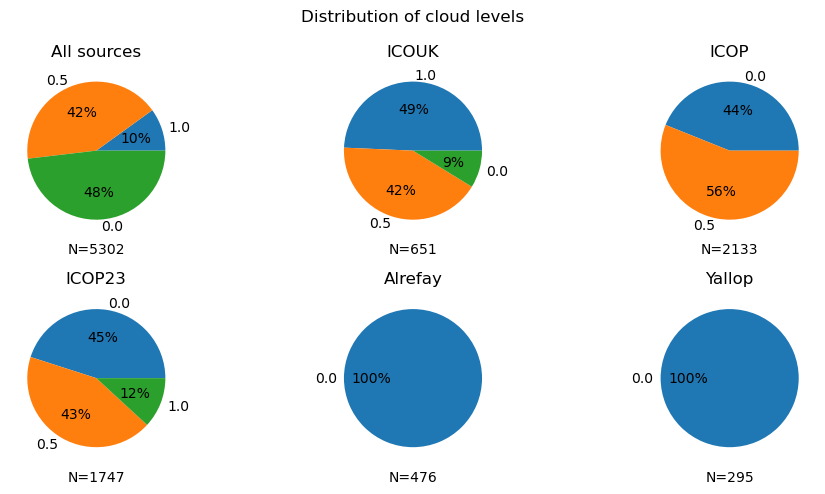

In [9]:
plot_pie_distribution("Cloud Level", "Distribution of cloud levels")

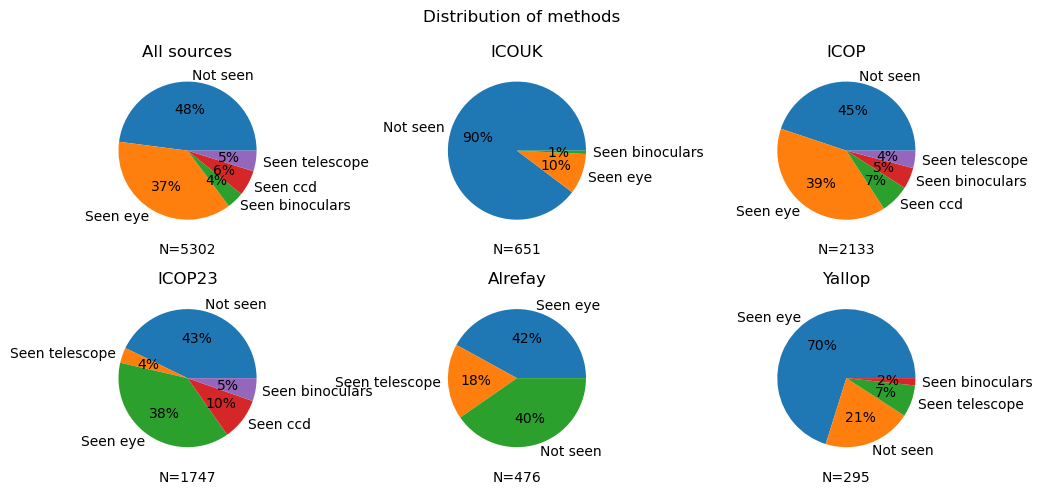

In [10]:
plot_pie_distribution("Method", "Distribution of methods")

c:\ProgramData\miniconda3\envs\mphys-moon\Lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


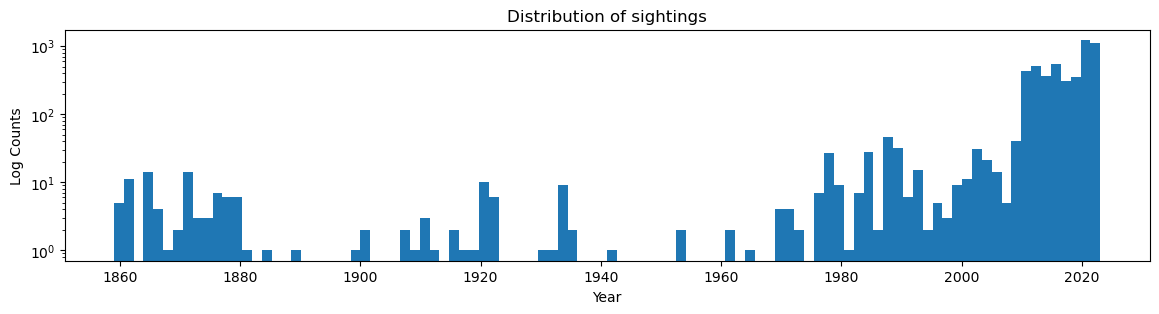

In [11]:
dates_list = [datetime.strptime(Time(date,format="jd").strftime('%Y-%M-%d'), '%Y-%M-%d').date() for date in data["Date"]]

fig = plt.figure(figsize=(14,3))
ax = fig.add_subplot(1,1,1)

ax.hist(dates_list,log=True,bins=100)
ax.set_title("Distribution of sightings")
ax.set_ylabel("Log Counts")
ax.set_xlabel("Year")
plt.show()

<Figure size 640x480 with 0 Axes>

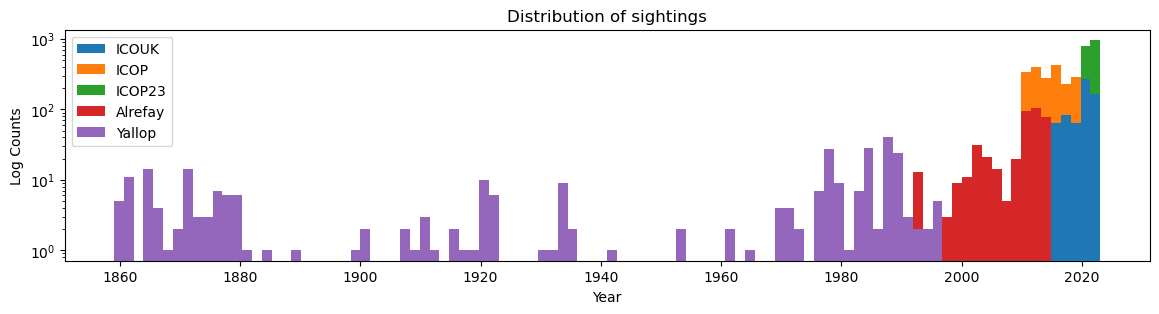

In [12]:
dates_list = [datetime.strptime(Time(date,format="jd").strftime('%Y-%M-%d'), '%Y-%M-%d').date() for date in data["Date"]]
#print(dates_list[1].timestamp())

(n, bins, patches) = plt.hist(dates_list, bins=100)
plt.clf()

fig = plt.figure(figsize=(14,3))
ax = fig.add_subplot(1,1,1)

for source, name in zip(sources,source_names):
    zorder = 0
    if name=="ICOUK":
        zorder = 5
    dates_list = [datetime.strptime(Time(date,format="jd").strftime('%Y-%M-%d'), '%Y-%M-%d').date() for date in source["Date"]]
    ax.hist(dates_list,bins,log=True,label=name,zorder=zorder)
ax.set_title("Distribution of sightings")
ax.set_ylabel("Log Counts")
ax.set_xlabel("Year")
ax.legend()
plt.show()

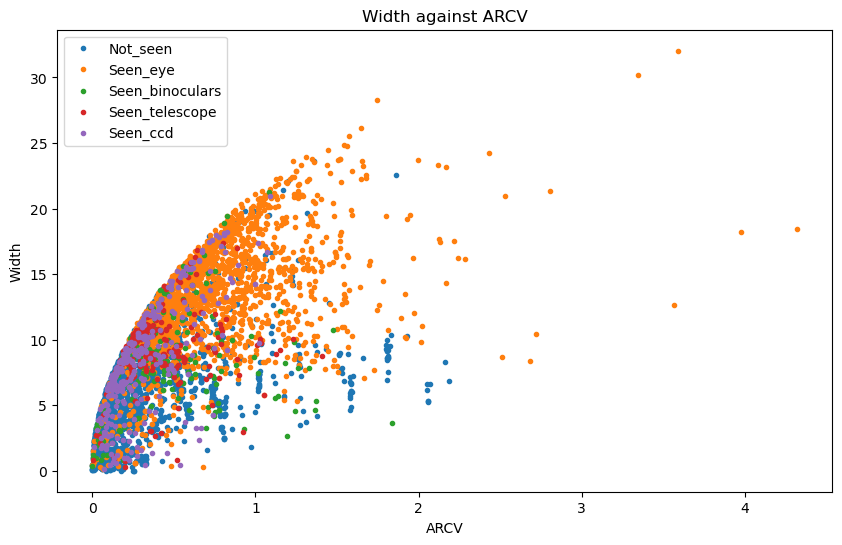

In [13]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)

labels = ["Not_seen","Seen_eye","Seen_binoculars","Seen_telescope","Seen_ccd"]

for label in labels:
    #source = data[data["Method"]==label]
    ax.plot(data[data["Method"]==label]["W'"], data[data["Method"]==label]["ARCV"],".",label=label)
    
ax.set_title("Width against ARCV")
ax.set_ylabel("Width")
ax.set_xlabel("ARCV")
ax.legend()
plt.show()

## Accuracy of Yallop

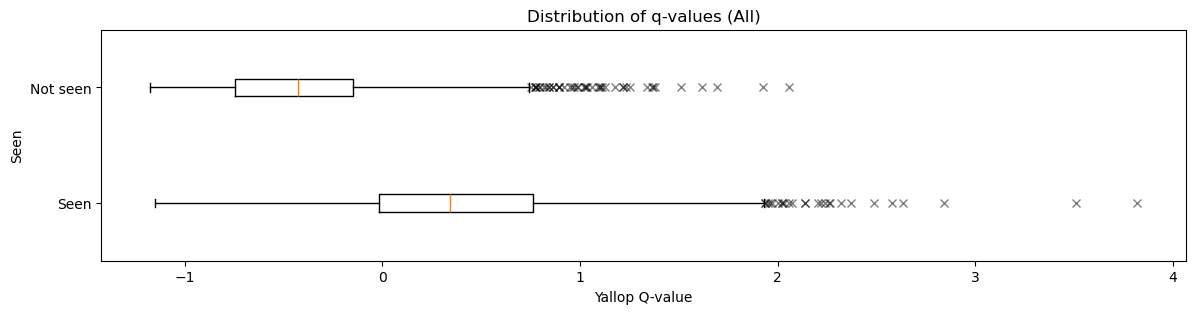

In [14]:
seen_q_values = data["q'"][data["Seen"]=="Seen"]
not_seen_q_values = data["q'"][data["Seen"]=="Not_seen"]

fig = plt.figure(figsize=(14,3))
ax = fig.add_subplot(1,1,1)

bp = ax.boxplot([seen_q_values,not_seen_q_values],vert = 0)

for flier in bp['fliers']:
    flier.set(marker ='x',
              color ='black',
              alpha = 0.5)
    
ax.set_title("Distribution of q-values (All)")
ax.set_ylabel("Seen")
ax.set_xlabel("Yallop Q-value")
ax.set_yticklabels(['Seen', 'Not seen'])
plt.show()

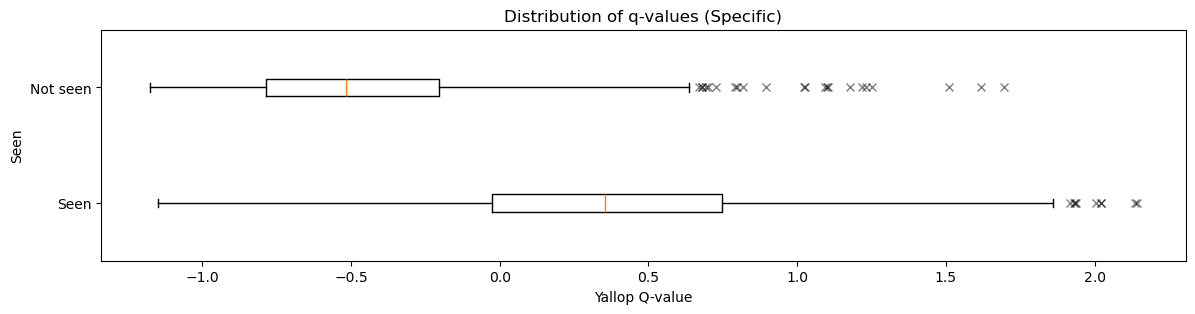

In [15]:
data_to_check = data[data["Source"]=="ICOP"]
seen_q_values = data_to_check["q'"][data_to_check["Seen"]=="Seen"]
not_seen_q_values = data_to_check["q'"][data_to_check["Seen"]=="Not_seen"]

fig = plt.figure(figsize=(14,3))
ax = fig.add_subplot(1,1,1)

bp = ax.boxplot([seen_q_values,not_seen_q_values],vert = 0)

for flier in bp['fliers']:
    flier.set(marker ='x',
              color ='black',
              alpha = 0.5)
    
ax.set_title("Distribution of q-values (Specific)")
ax.set_ylabel("Seen")
ax.set_xlabel("Yallop Q-value")
ax.set_yticklabels(['Seen', 'Not seen'])
plt.show()

In [16]:
below_danjon_data = data[np.logical_and(data["Seen"]=="Seen",7>=data["ARCV"])]
print(below_danjon_data.shape[0])
print(f"Total: {data.shape[0]}. Below ARCV<7 (Danjon limit): {below_danjon_data.shape[0]} {below_danjon_data.shape[0]/data.shape[0]:.2%}")

for source, name in zip(sources,source_names):
    no_below_danjon = source[np.logical_and(source['Seen']=='Seen', 7>=source["ARCV"])].shape[0]
    print(f"{name}: {no_below_danjon}, {no_below_danjon/source.shape[0]:.2%} ")

# #interesting_data = icop_data[np.logical_and(icop_data["Seen"]=="Seen",-0.293>=icop_data["q'"])]
# interesting_data = yallop_data[np.logical_and(yallop_data["Seen"]=="Seen",-0.293>=yallop_data["q'"])]
# interesting_data = interesting_data.drop(["Methods","Illumination","Cloud Level","W","q","Moon-Earth Dist","Sun-Moon Dist","Moon Az", "Moon Alt","Sun Az", "Sun Alt"],axis=1)
# interesting_data["Sunset"] = Time(interesting_data["Sunset"],format="jd").to_datetime()
# interesting_data["Moonset"] = Time(interesting_data["Moonset"],format="jd").to_datetime()
# interesting_data["Date"] = Time(interesting_data["Date"],format="jd").to_datetime()

314
Total: 5302. Below ARCV<7 (Danjon limit): 314 5.92%
ICOUK: 4, 0.61% 
ICOP: 149, 6.99% 
ICOP23: 152, 8.70% 
Alrefay: 1, 0.21% 
Yallop: 8, 2.71% 


In [17]:
below_danjon_data = data[np.logical_and(data["Method"]=="Seen_eye",7>=data["ARCV"])]
print(below_danjon_data.shape[0])
print(f"Total: {data.shape[0]}. Below ARCV<7 for eye: {below_danjon_data.shape[0]}")

for source, name in zip(sources,source_names):
    no_below_danjon = source[np.logical_and(source["Method"]=="Seen_eye", 7>=source["ARCV"])].shape[0]
    print(f"{name}: {no_below_danjon} {no_below_danjon/source.shape[0]:.2%}")

below_danjon_data.head(10)

113
Total: 5302. Below ARCV<7 for eye: 113
ICOUK: 2 0.31%
ICOP: 30 1.41%
ICOP23: 77 4.41%
Alrefay: 0 0.00%
Yallop: 4 1.36%


,Index,Date,Latitude,Longitude,Moon Age,Sunset,Moonset,Lag,Moon Alt,Moon Az,...,Parallax,W,W',q,q',Cloud Level,Seen,Method,Methods,Source
577,577,2.459850e+06,52.63860,-1.13169,1.843,2.459850e+06,2.459850e+06,39.35000,2.56529,250.07251,...,57.48537,1.17154,1.17242,0.07862,0.07906,0.5,Seen,Seen_eye,Seen_eye;Seen_binoculars;Seen_telescope;Seen_ccd,ICOUK
616,616,2.460174e+06,53.92200,-3.01200,1.430,2.460174e+06,2.460174e+06,43.31667,2.81513,283.85644,...,53.93830,0.54156,0.54198,-0.24181,-0.24157,0.5,Seen,Seen_eye,Seen_eye;Seen_binoculars;Seen_telescope;Seen_ccd,ICOUK
710,59,2.455272e+06,39.67332,-94.79483,0.145,2.455272e+06,2.455272e+06,9.01667,0.35739,272.94725,...,54.65117,0.04570,0.04570,-0.95897,-0.95897,0.5,Seen,Seen_eye,Seen_eye;Seen_binoculars;Seen_telescope;Seen_ccd,ICOP
727,76,2.455302e+06,37.22966,-80.41368,1.042,2.455302e+06,2.455302e+06,-1410.25000,27.34343,87.42503,...,50.04109,0.37378,0.37628,-0.55914,-0.55769,0.5,Seen,Seen_eye,Seen_eye;Seen_binoculars;Seen_telescope;Seen_ccd,ICOP
756,105,2.455361e+06,37.22966,-80.41368,0.571,2.455361e+06,2.455361e+06,31.46667,2.33792,298.63006,...,59.23428,0.11309,0.11317,-0.55860,-0.55855,0.5,Seen,Seen_eye,Seen_eye;Seen_binoculars;Seen_telescope;Seen_ccd,ICOP
805,154,2.455449e+06,37.22966,-80.41368,1.556,2.455449e+06,2.455450e+06,26.31667,2.21530,256.98684,...,60.79477,1.25313,1.25399,0.04926,0.04969,0.5,Seen,Seen_eye,Seen_eye;Seen_binoculars;Seen_telescope;Seen_ccd,ICOP
919,268,2.455745e+06,37.22966,-80.41368,0.666,2.455745e+06,2.455745e+06,16.63333,1.05848,293.79995,...,57.78724,0.16040,0.16045,-0.76850,-0.76847,0.5,Seen,Seen_eye,Seen_eye;Seen_binoculars;Seen_telescope;Seen_ccd,ICOP
920,269,2.455745e+06,29.75894,-95.36770,0.696,2.455745e+06,2.455745e+06,21.73333,1.78584,291.45948,...,57.78524,0.16979,0.16988,-0.63129,-0.63124,0.0,Seen,Seen_eye,Seen_eye;Seen_binoculars;Seen_telescope;Seen_ccd,ICOP
940,289,2.455774e+06,39.78373,-100.44588,0.300,2.455774e+06,2.455774e+06,-13.30000,-1.88454,288.61669,...,59.16274,0.08283,0.08279,-0.92344,-0.92347,0.0,Seen,Seen_eye,Seen_eye;Seen_binoculars;Seen_telescope;Seen_ccd,ICOP
946,295,2.455775e+06,37.22966,-80.41368,1.251,2.455775e+06,2.455775e+06,23.06667,1.88757,278.91814,...,59.58657,0.70934,0.70975,-0.31053,-0.31031,0.5,Seen,Seen_eye,Seen_eye;Seen_binoculars;Seen_telescope;Seen_ccd,ICOP


In [18]:
#Not sure this actually works as some of the sunsets will be sunrises?
minute = -TimeDelta(60, format="sec") #Moonset must be 1 minute later than sunset for morning observation
morning_data = data[(data["Moonset"]-data["Sunset"])<minute]
evening_data = data[(data["Moonset"]-data["Sunset"])>=minute]

print(f"Total: {data.shape[0]} Morning: {morning_data.shape[0]} Evening: {evening_data.shape[0]}")

for source, name in zip(sources,source_names):
    smorning_data = source[(source["Moonset"]-source["Sunset"])<minute].shape[0]
    sevening_data = source[(source["Moonset"]-source["Sunset"])>=minute].shape[0]
    print(f"{name}: Morning: {smorning_data} Evening: {sevening_data}")

# #interesting_data = icop_data[np.logical_and(icop_data["Seen"]=="Seen",-0.293>=icop_data["q'"])]
# interesting_data = yallop_data[yallop_data["Moon Age"]>20]
# interesting_data = interesting_data.drop(["Methods","Illumination","Cloud Level","W","q","Moon-Earth Dist","Sun-Moon Dist","Moon Az", "Moon Alt","Sun Az", "Sun Alt"],axis=1)
# interesting_data["Sunset"] = Time(interesting_data["Sunset"],format="jd").to_datetime()
# interesting_data["Moonset"] = Time(interesting_data["Moonset"],format="jd").to_datetime()
# interesting_data["Date"] = Time(interesting_data["Date"],format="jd").to_datetime()

Total: 5302 Morning: 445 Evening: 4857
ICOUK: Morning: 6 Evening: 645
ICOP: Morning: 98 Evening: 2035
ICOP23: Morning: 321 Evening: 1426
Alrefay: Morning: 0 Evening: 476
Yallop: Morning: 20 Evening: 275


In [19]:
def yallop_accuracy(source):
    q_values = source["q'"].astype("float")
    quantified_q = np.empty((q_values.size),dtype=str)

    quantified_q[q_values > 0.216] = "Seen" #A Easily visible
    quantified_q[np.logical_and(0.216 >= q_values, q_values > -0.014)] = "Seen" #B Visible under perfect conditions
    quantified_q[np.logical_and(-0.014 >= q_values, q_values > -0.160)] = "Seen" #C May need optical aid to find crescent
    quantified_q[np.logical_and(-0.160 >= q_values, q_values > -0.232)] = "Not_seen" #D Will need optical aid to find crescent
    quantified_q[np.logical_and(-0.232 >= q_values, q_values > -0.293)] = "Not_seen" #E Not visible with a telescope ARCL ≤ 8·5°
    quantified_q[-0.293 >= q_values] = "Not_seen" #F Not visible, below Danjon limit, ARCL ≤ 8°
    return accuracy_score(source['Seen'].str[0], quantified_q)

print(f"Yallop Accuracy (Seen/Not_seen): {yallop_accuracy(data):.1%}")
for source, name in zip(sources,source_names):
    print(f"{name}: Yallop Accuracy (Seen/Not_seen): {yallop_accuracy(source):.1%}")

Yallop Accuracy (Seen/Not_seen): 78.8%
ICOUK: Yallop Accuracy (Seen/Not_seen): 66.5%
ICOP: Yallop Accuracy (Seen/Not_seen): 80.2%
ICOP23: Yallop Accuracy (Seen/Not_seen): 76.3%
Alrefay: Yallop Accuracy (Seen/Not_seen): 97.1%
Yallop: Yallop Accuracy (Seen/Not_seen): 82.0%


In [20]:
def yallop_accuracy_eye(source):
    q_values = source["q'"].astype("float")
    quantified_q = np.empty((q_values.size),dtype=str)

    data["Method"] = source["Method"].replace("Seen_binoculars", "Aid")
    data["Method"] = source["Method"].replace("Seen_telescope", "Aid")
    data["Method"] = source["Method"].replace("Seen_ccd", "Aid")

    quantified_q[q_values > 0.216] = "Seen" #A Easily visible
    quantified_q[np.logical_and(0.216 >= q_values, q_values > -0.014)] = "Seen" #B Visible under perfect conditions
    quantified_q[np.logical_and(-0.014 >= q_values, q_values > -0.160)] = "Seen" #C May need optical aid to find crescent
    quantified_q[np.logical_and(-0.160 >= q_values, q_values > -0.232)] = "Aid" #D Will need optical aid to find crescent
    quantified_q[np.logical_and(-0.232 >= q_values, q_values > -0.293)] = "Not_seen" #E Not visible with a telescope ARCL ≤ 8·5°
    quantified_q[-0.293 >= q_values] = "Not_seen" #F Not visible, below Danjon limit, ARCL ≤ 8°
    return accuracy_score(source['Seen'].str[0], quantified_q)

print(f"Yallop Accuracy (Seen/With aid/Not_seen): {yallop_accuracy_eye(data):.1%}")
for source, name in zip(sources,source_names):
    print(f"{name}: Yallop Accuracy (Seen/With aid/Not_seen): {yallop_accuracy_eye(source):.1%}")

Yallop Accuracy (Seen/With aid/Not_seen): 75.9%
ICOUK: Yallop Accuracy (Seen/With aid/Not_seen): 55.1%
ICOP: Yallop Accuracy (Seen/With aid/Not_seen): 78.2%
ICOP23: Yallop Accuracy (Seen/With aid/Not_seen): 74.1%
Alrefay: Yallop Accuracy (Seen/With aid/Not_seen): 97.1%
Yallop: Yallop Accuracy (Seen/With aid/Not_seen): 80.7%
